In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [148]:
#all imports
import pandas as pd
import numpy as np
import copy
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

from sklearn.metrics import fbeta_score, f1_score,precision_score,recall_score,accuracy_score, roc_curve, auc,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from credit_actual_data_values import substitute

In [159]:
#loading data into a pandas data frame
df=pd.read_csv('germanCreditData_hackathon.data', sep=" ", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [160]:
#meaningful tranformation of dataframe copy
df_vis = copy.deepcopy(df)
df_vis = substitute(df_vis)
df_vis.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,Good Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad Risk


In [161]:
last_ix = len(df.columns) - 1
X, y = df.drop(last_ix, axis=1), df[last_ix]

In [164]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [124]:
# Categorical features has to be converted into integer values for the model to process. 
#This is done through one hot encoding.
# select categorical features
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
# one hot encode categorical features only
ct = ColumnTransformer([('o',OneHotEncoder(),cat_ix)], remainder='passthrough')
X = ct.fit_transform(X)
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)
print(X.shape, y.shape, Counter(y))

(1000, 61) (1000,) Counter({0: 700, 1: 300})


In [125]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [139]:
#5 different classifiers
classifiers = {
    
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "GradientBoost" : GradientBoostingClassifier()
}

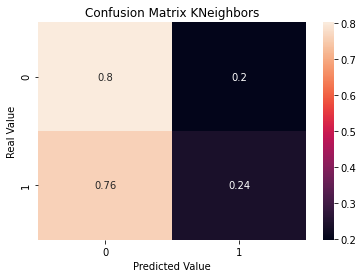

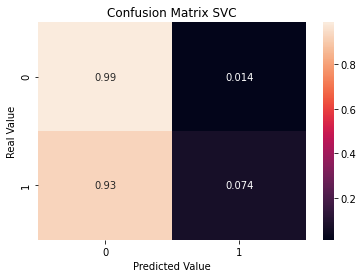

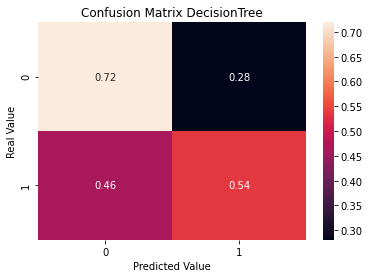

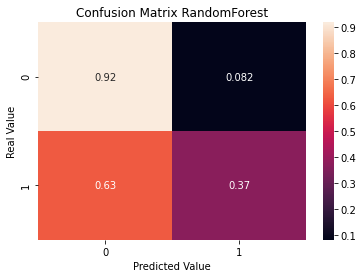

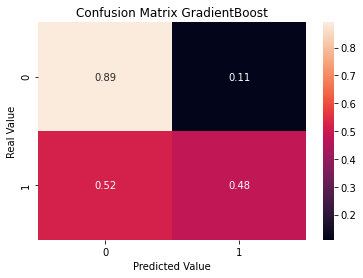

[0.65, 0.74, 0.67, 0.77, 0.78]
[0.65, 0.74, 0.67, 0.77, 0.78]
[0.65, 0.74, 0.67, 0.77, 0.78]
[0.5202850877192983, 0.49019607843137253, 0.6143057503506311, 0.6593097318915716, 0.6984649122807018]


In [166]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for key, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    precision = precision_score(y_test,y_pred, average='micro')
    precision_scores.append(precision)
    recall = recall_score(y_test,y_pred, average='micro')
    recall_scores.append(recall)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_scores.append(accuracy)
    f1 = f1_score(y_test,y_pred, average='macro')
    f1_scores.append(f1)
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix '+key)
    ax.set_xlabel('Predicted Value')
    ax.set_ylabel('Real Value')

plt.show()
print(accuracy_scores)
print(precision_scores)
print(recall_scores)
print(f1_scores)

Text(33.0, 0.5, 'Real Value')

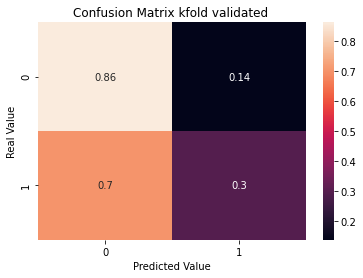

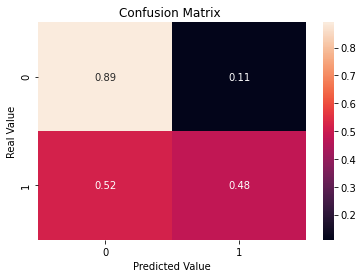

In [168]:
#picking the one with best f1 score which is gradientboost
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
y_crossvalpred = cross_val_predict(gb,X_test,y_test,cv=5)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_crossvalpred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix kfold validated ')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix ')
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Real Value')
